<div style="text-align: center;">
    <h1 style="color: #3498db;">Artificial Intelligence & Machine Learning</h1>
    <h2 style="color: #3498db;">Part 3: Evaluation metrics for clustering</h2>
</div>

-------------------------------------------------------------

<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <b>Authors:</b> K. Said<br>
    <b>Date:</b> 08-09-2023
</div>

<div style="background-color: #e6e6e6; padding: 10px; border-radius: 5px; margin-top: 10px;">
    <p>This notebook is part of the "Artificial Intelligence & Machine Learning" lecture material. The following copyright statement applies to all contents and code within this file.</p>
    <b>Copyright statement:</b>
    <p>This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors and lecturers.</p>
</div>


<h1 style="color:rgb(0,120,170)">Introduction</h1>

-----------------------------------------------


<h2 style="color:rgb(0,120,0)">Our Task</h2>

-------------------------------------------------

After learning about evaluation metrics for classification and regression tasks, it's now time to get started with some metrics for the clustering methods. We will go through 3 different metrics and try to get a better understanding about their differences and use-cases.
At the end you will also have to implement a simple clustering model, choose an evaluation metric and interpret the result of it.

<h1 style="color:rgb(0,120,170)">Evaluation for clustering - Example</h1>

Other than in the case of regression and classificaiton tasks, it is much harder to evaluate how good a clustering-prediction is. When do we know if the found cluster of our model is good enough and also how do we know if the amount of found clusters is correct? It could be the case that we have some data, where the true amount of clusters should be 3, but our model found 4 clusters. Based on what criteria should the evaluation be made? We know that the clusters found by our model should be somewhat similar to the true ones, but what does similar mean in this context? 
The same shape? The same centers? How good is the cluster in the sense of "Can we further split it or should we keep it as it is"?

In [1]:
# Some imports we need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.decomposition import PCA


np.random.seed(42) # DO NOT CHANGE

<details>
<summary style="font-size: larger; color: white; background-color: rgba(255, 165, 0, 0.6); border: 1px solid grey; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Load data and make predictions</summary>

<div style="background-color: rgba(255, 204, 153, 0.6); padding: 10px; border-radius: 5px;">
   First we will load our example toy dataset, in this case it's the well-known Iris-Flower-Dataset, with which you probably had already some encounters. Afterwards we load a simple model and try to cluster the dataset.
   
    
</div>
</details>


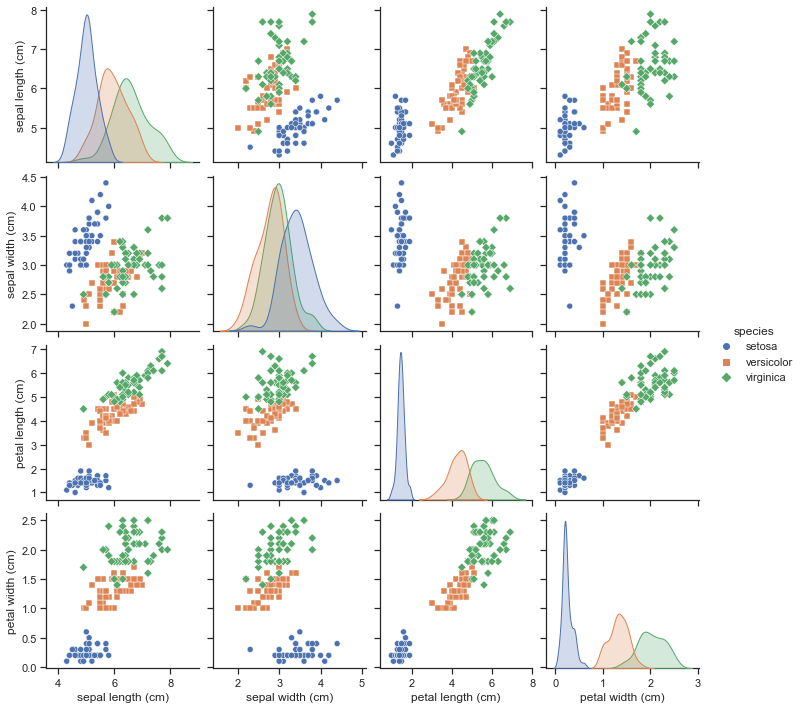

In [2]:
# Load the Iris dataset and have a short look at it
iris = load_iris()
X = iris.data
target = iris.target
target_names = iris.target_names

iris_df = pd.DataFrame(data=X, columns=iris.feature_names)

iris_df['species'] = target_names[target]

sns.set(style="ticks")
sns.pairplot(iris_df, hue="species", markers=["o", "s", "D"])
plt.show()


In [3]:
# Make clustering --> Let's say we know there have to be around 3 clusters
n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <b>Dataset and Prediction</b>: After loading the dataset we use the KMeans model for clustering. But be aware that KMeans is not the same algorithm as k-NN. While KMeans is mainly used for clustering tasks (Unsupervised Machine Learning), k-NN instead is mainly used for classification tasks (Supervised Machine Learning). In KMeans the K stands for the number of clusters, while the k in k-nn stands for the number of nearest neighbors. 
</div>


<details>
<summary style="font-size: larger; color: white; background-color: rgba(255, 165, 0, 0.6); border: 1px solid grey; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Average within-cluster distance (inertia)</summary>

<div style="background-color: rgba(255, 204, 153, 0.6); padding: 10px; border-radius: 5px;">
   Now that we have some clustering-results, we want to evaluate how well our cluster-model performs. For this purpose, we generally learned about 3 different metrics, one of which is "Average within-cluster distance"
    
${Average Within-Cluster Distance (AWCD)}$ = $\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{n} \frac{d(x_{ij}, c_i)}{n}$



Where:
- $N$ is the total number of clusters.
- $n$ is the number of data points in cluster $i$.
- $x_{ij}$ is the \(j\)-th data point in cluster $i$.
- $c_i$ is the centroid of cluster $i$.
- $d(x_{ij}, c_i)$ is the distance between data point $x_{ij}$ and the centroid $c_i$.
- The outer sum is taken over all clusters, and the inner sum is taken over all data points within each cluster.

   
    
</div>
</details>


In [4]:
# Calculate average within-cluster distance (inertia)
inertia = kmeans.inertia_
avg_within_cluster_distance = inertia / len(X)
print(f"Average Within-Cluster Distance (Inertia): {avg_within_cluster_distance:.2f}")



Average Within-Cluster Distance (Inertia): 0.53


<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <b>What does the AWCD actually measure?</b> Well, the AWCD doesn't consider the distances between different clusters. It focuses solely on the compactness of each cluster. A lower AWCD indicates that data points within each cluster are closer to their cluster's centroid. This suggests that the clusters are more tightly packed, and the clustering algorithm has done a better job of grouping similar data points together.
</div>


<details>
<summary style="font-size: larger; color: white; background-color: rgba(255, 165, 0, 0.6); border: 1px solid grey; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Average between-cluster distance</summary>

<div style="background-color: rgba(255, 204, 153, 0.6); padding: 10px; border-radius: 5px;">
   The average between-cluster distance measures the average distance between different clusters in a clustering solution. The formula of this measure is given by:


${Average Between-Cluster Distance (ABCD)} = \frac{1}{N(N-1)} \sum_{i=1}^{N} \sum_{j=1, j \neq i}^{N} \frac{d(c_i, c_j)}{N-1}$


Where:
- $N$ is the total number of clusters.
- $c_i$ is the centroid of cluster $i$.
- $c_j$ is the centroid of cluster $j$.
- $d(c_i, c_j)$ is the distance between the centroids of clusters $i$ and $j$.
- The outer sum is taken over all clusters, and the inner sum is taken over all clusters except for $i$.


   
    
</div>
</details>


In [5]:
# Avg between-cluster distance
distances = pairwise_distances(X)
avg_between_cluster_distance = np.mean([np.mean(distances[labels == i]) for i in range(n_clusters)])
print(f"Average Between-Cluster Distance: {avg_between_cluster_distance:.2f}")


Average Between-Cluster Distance: 2.58


<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <b>What does the ABCD actually measure?</b> A higher ABCD indicates greater separation between the clusters. If the ABCD is high, it means that the centroids of different clusters are relatively far apart from each other, and the clusters are more distinct and well-separated. However, you also have to keep in mind that ABCD is complementing the Average Within-Cluster Distance (AWCD). While AWCD measures the cohesion or tightness of individual clusters, ABCD measures the separation between clusters. 
By combining both metrics, we are able to better evaluate the overall quality of a clustering solution.
    
</div>




<details>
<summary style="font-size: larger; color: white; background-color: rgba(255, 165, 0, 0.6); border: 1px solid grey; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Silhouette Score</summary>

<div style="background-color: rgba(255, 204, 153, 0.6); padding: 10px; border-radius: 5px;">
   The Silhouette Score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The formula for the Silhouette Score is as follows:


${Silhouette Score (SS)} = \frac{1}{N} \sum_{i=1}^{N} s(i)$


Where:
- \(N\) is the total number of data points.
- \(s(i)\) is the silhouette value for data point \(i\), calculated as:


- $s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$


- \(a(i)\) is the average distance from data point \(i\) to the other data points within the same cluster.
- \(b(i)\) is the smallest average distance from data point \(i\) to the data points in any other cluster, minimized over clusters (i.e., it represents the separation from the nearest neighboring cluster).

   
    
</div>
</details>


In [6]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.55


<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <b>What does the Silhouette Score actually measure?</b> Basically the Silhouette Score measures the overall quality of a clustering solution by considering both the cohesion within clusters and the separation between clusters. It provides a single value that can help in selecting the optimal number of clusters or evaluating the quality of a clustering result.
     The higher the Score, the better better the clustering quality, as it means that data points within the same cluster are closer to each other than to data points in neighboring clusters
</div>




<details>
<summary style="font-size: larger; color: white; background-color: rgba(255, 165, 0, 0.6); border: 1px solid grey; padding: 5px 15px; border-radius: 8px; cursor: pointer;">True Clusters vs Predicted Clusters</summary>

<div style="background-color: rgba(255, 204, 153, 0.6); padding: 10px; border-radius: 5px;">
   At the very end we now simply want to visually check how well our model performed the clustering, which is why we will use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html" target="_blank" style="color: blue; text-decoration: none;">PCA</a> to downproject the data and compare the actual with the predicted clusters.
   
    
</div>
</details>


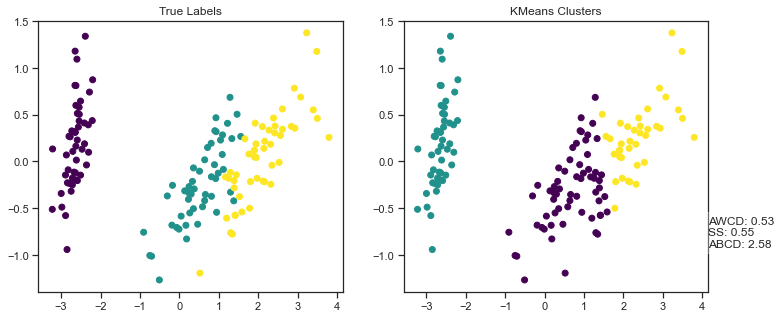

In [7]:
# Get actual clusters by using pca
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(12, 5))
# Actual Clusters
plt.subplot(1, 2, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=target, cmap='viridis')
plt.title("True Labels")
# Predicted Clusters
plt.subplot(1, 2, 2)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
plt.title("KMeans Clusters")

legend = f'AWCD: {avg_within_cluster_distance:.2f}\nSS: {silhouette_avg:.2f}\nABCD: {avg_between_cluster_distance:.2f}'
plt.figtext(0.90, 0.25, legend, fontsize=12, bbox=dict(facecolor='white', alpha=0.3))

plt.show()


<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <b>Visualization Clustering</b> Looks pretty nice, although not perfect, if we have a closer look. For example in the bottom right area some of the dots were not clustered correctly. But out of interest, how will the plot look like if we set the k parameter instead to 4 or even more? Think about it.
</div>




<h1 style="color:rgb(0,120,170)">Evaluation for clustering - Your turn</h1>

As in the plot above suggested, try to think how the plot will look like when setting the k-parameter to 4, 5 or even 6. How will the evaluation metrics change? Will they improve or get worse? Also how will another clustering model perform based on above dataset?

If you answered all questions, try to implement your own model, load your dataset or a dataset that interests you and create some clustering predictions. Afterwards evaluate your results.
